## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import os

## Read the Microsoft stock file 

In [2]:
df = pd.read_excel("/kaggle/input/microsoft-stock/Microsoft_20years_Stock.xlsx")


In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.623899,38409100,30.959999
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.631531,49749600,30.770000
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.486507,58182400,30.450001
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.242258,50559700,30.660000
4,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.402540,51197400,30.270000
...,...,...,...,...,...,...,...,...
3296,2023-02-07,260.529999,268.769989,260.079987,267.559998,266.891510,50841400,266.730011
3297,2023-02-08,273.200012,276.760010,266.209991,266.730011,266.063599,54686000,263.619995
3298,2023-02-09,273.799988,273.980011,262.799988,263.619995,262.961365,42375100,263.100006
3299,2023-02-10,261.529999,264.089996,260.660004,263.100006,262.442657,25760900,271.320007


## start with visulaization 

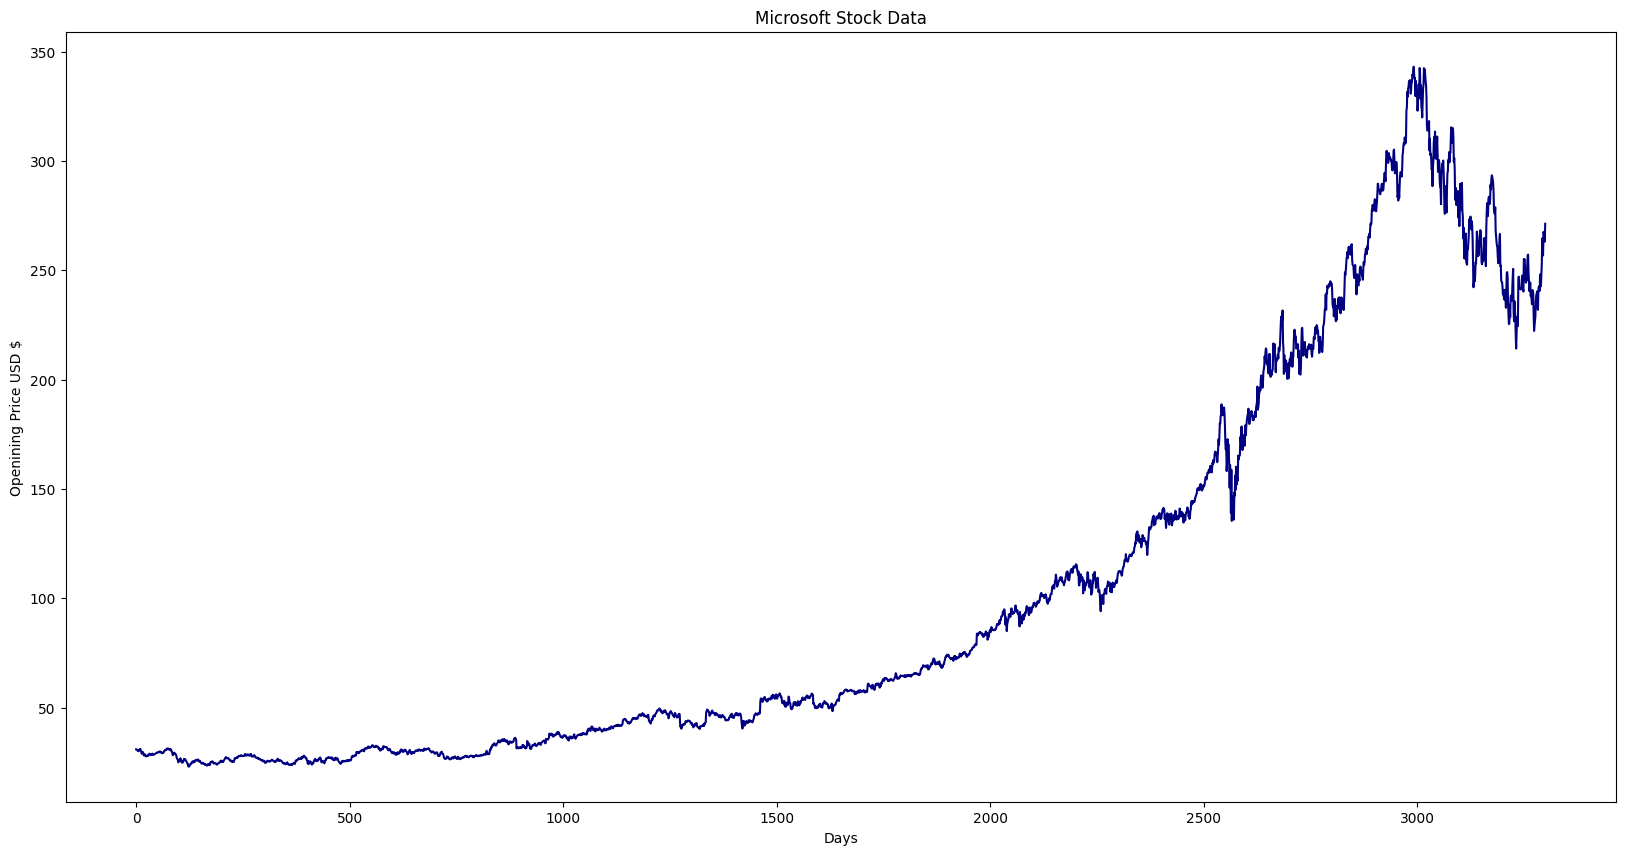

In [4]:
plt.figure(figsize = (20,10))
plt.title("Microsoft Stock Data")
plt.xlabel("Days")
plt.ylabel("Openining Price USD $")

plt.plot(df["Close"], color="navy", lw=1.5)
plt.show()



## Remove last 200 days of data for Testing

In [5]:
Train = df.drop(df.index[-200:])
Final_test = df.tail(200).copy()


In [6]:
Train.drop(labels=["Date","Prediction"], axis = 1)

,Open,High,Low,Close,Adj Close,Volume
0,30.620001,31.100000,30.590000,30.950001,23.623899,38409100
1,30.850000,31.100000,30.639999,30.959999,23.631531,49749600
2,30.879999,31.080000,30.520000,30.770000,23.486507,58182400
3,30.629999,30.700001,30.190001,30.450001,23.242258,50559700
4,30.280001,30.879999,30.240000,30.660000,23.402540,51197400
...,...,...,...,...,...,...
3096,288.579987,293.299988,280.059998,280.809998,278.081909,29454600
3097,281.679993,283.200012,273.380005,274.029999,271.367767,29405800
3098,273.290009,281.109985,270.769989,280.720001,277.992828,35678900
3099,277.500000,278.359985,270.000000,270.220001,267.594788,46518400


## Define the Training Data as X_train and Y_train

In [7]:
x_train = Train.drop(labels=["Date","Prediction"], axis = 1)
y_train = Train["Prediction"]
x_test = Final_test.drop(labels=["Date","Prediction"], axis = 1)

In [8]:
Train

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.623899,38409100,30.959999
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.631531,49749600,30.770000
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.486507,58182400,30.450001
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.242258,50559700,30.660000
4,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.402540,51197400,30.270000
...,...,...,...,...,...,...,...,...
3096,2022-04-21,288.579987,293.299988,280.059998,280.809998,278.081909,29454600,274.029999
3097,2022-04-22,281.679993,283.200012,273.380005,274.029999,271.367767,29405800,280.720001
3098,2022-04-25,273.290009,281.109985,270.769989,280.720001,277.992828,35678900,270.220001
3099,2022-04-26,277.500000,278.359985,270.000000,270.220001,267.594788,46518400,283.220001


## Train the Decision Tree

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [10]:
Hyper_parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]}

Tree_Gridsearch_parameters = GridSearchCV(DecisionTreeRegressor(random_state=42), Hyper_parameters, scoring='neg_root_mean_squared_error', cv=5, verbose=1)


In [11]:
Tree_models = Tree_Gridsearch_parameters.fit(x_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


## Check the best Model

In [12]:
print("The best parameter combination is  ")
print(Tree_models.best_estimator_)

print(Tree_models.best_params_)

Final_model = Tree_models.best_estimator_


The best parameter combination is  
DecisionTreeRegressor(max_depth=14, random_state=42)
{'max_depth': 14}


In [13]:
print("The best model error was ")
print(Tree_models.best_score_)

The best model error was 
-28.566469008516528


In [14]:
importances = Final_model.feature_importances_

importances

names=list(x_train.columns.values)
for i in range(x_train.shape[1]):
    print((names[i], importances[[i]]))

('Open', array([0.00343367]))
('High', array([0.16415909]))
('Low', array([0.81457852]))
('Close', array([0.01567892]))
('Adj Close', array([0.00200279]))
('Volume', array([0.00014701]))


## Apply our model on the Final test Data 

In [15]:
Tree_predictions = Final_model.predict(x_test)
true_values = Final_test['Prediction'].values



In [16]:
from sklearn.metrics import r2_score

R2 = r2_score(true_values, Tree_predictions)

def mean_absolute_precentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/ y_true)) * 100

mape = mean_absolute_precentage_error(true_values,Tree_predictions )


#print the results

print("R2 score : ", R2)
print("mape: ", mape)


R2 score :  0.8294621793390814
mape:  2.185127436314307


## Start with visulaize the performance of our Model

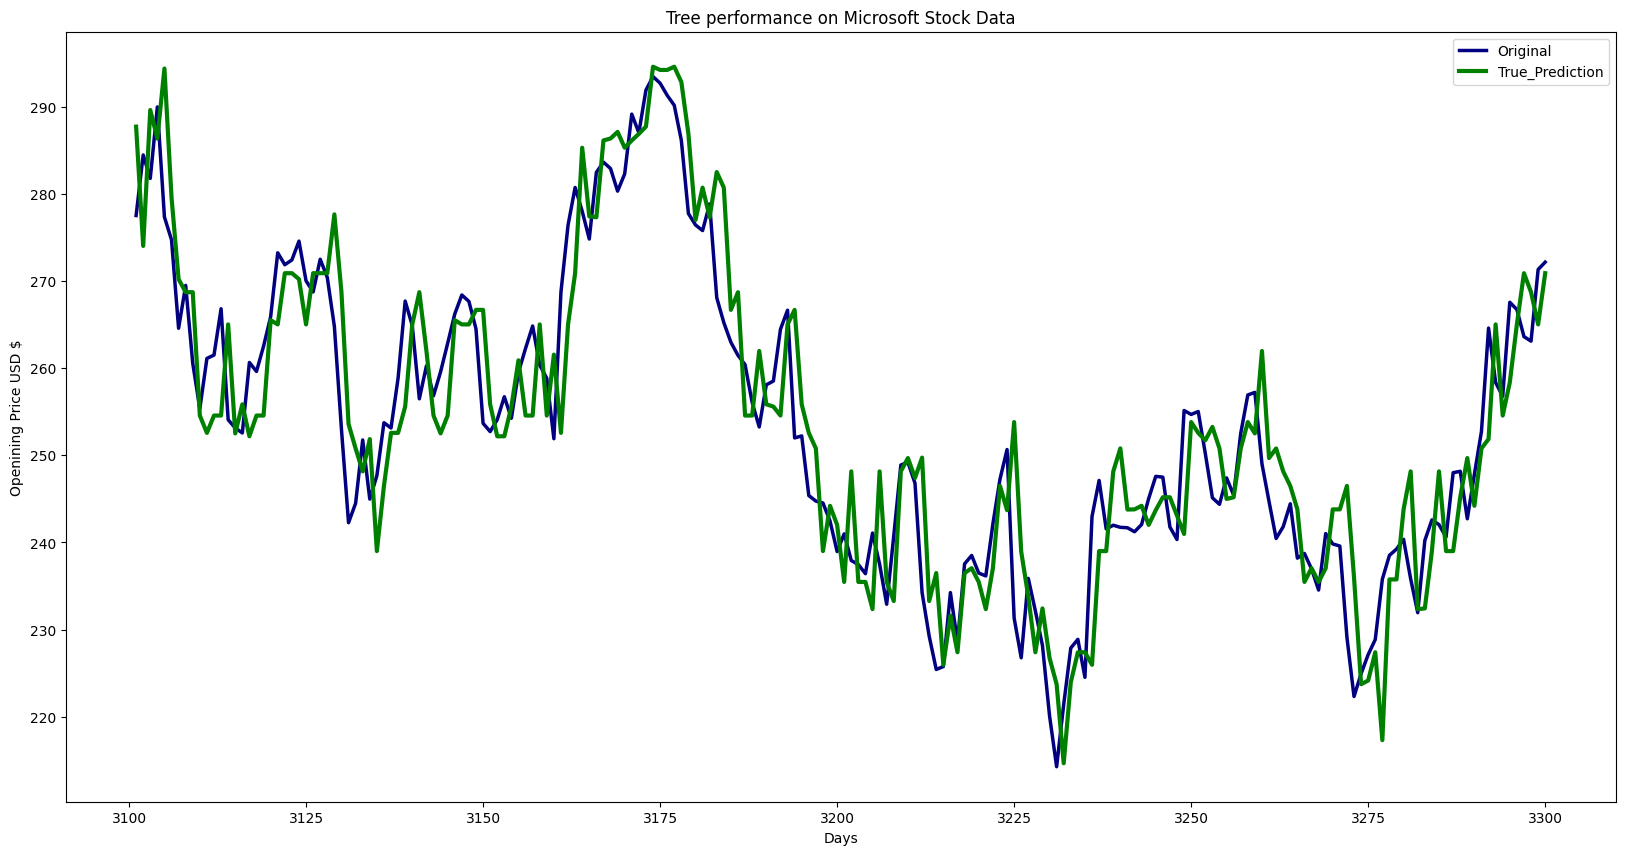

In [17]:
plt.figure(figsize = (20,10))
plt.title("Tree performance on Microsoft Stock Data")
plt.xlabel("Days")
plt.ylabel("Openining Price USD $")
#here we drawing the actual data
plt.plot(Final_test['Prediction'], color="navy", lw=2.5)


#Here we are drawing the predictions of the model
Tree_model_predictions = pd.DataFrame(index=Final_test.index, columns=[])
Tree_model_predictions['Prediction']=Tree_predictions
plt.plot(Tree_model_predictions['Prediction'],color='green',lw=3)
plt.legend(["Original","True_Prediction",'Tree_Model_predictions'])
plt.show()